In [1]:
conda install -c conda-forge pyreadstat

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import plotly.express as px

## 1. Read Data

In [4]:
df = pd.read_spss(r'C:\Users\s0576758\Desktop\HTW\Data Mining - Tilo\secom_mod.SAV')

df.set_index('ID',inplace=True)
df

class            timestamp  feature001  feature002  feature003  \
ID                                                                       
1.0       0.0  19/07/2008 11:55:00     3030.93     2564.00   2187.7333   
2.0       0.0  19/07/2008 12:32:00     3095.78     2465.14   2230.4222   
3.0       1.0  19/07/2008 13:17:00     2932.61     2559.94   2186.4111   
4.0       0.0  19/07/2008 14:43:00     2988.72     2479.90   2199.0333   
5.0       0.0  19/07/2008 15:22:00     3032.24     2502.87   2233.3667   
...       ...                  ...         ...         ...         ...   
1563.0    0.0  16/10/2008 15:13:00     2899.41     2464.36   2179.7333   
1564.0    0.0  16/10/2008 20:49:00     3052.31     2522.55   2198.5667   
1565.0    0.0  17/10/2008 05:26:00     2978.81     2379.78   2206.3000   
1566.0    0.0  17/10/2008 06:01:00     2894.92     2532.01   2177.0333   
1567.0    0.0  17/10/2008 06:07:00     2944.92     2450.76   2195.4444   

        feature004  feature005  feature006  feature007  feature008  ...  \
ID                                                                  ...   
1.0      1411.1265      1.3602       100.0     97.6133      0.1242  ...   
2.0      1463.6606      0.8294       100.0    102.3433      0.1247  ...   
3.0      1698.0172      1.5102       100.0     95.4878      0.1241  ...   
4.0       909.7926      1.3204       100.0    104.2367      0.1217  ...   
5.0      1326.5200      1.5334       100.0    100.3967      0.1235  ...   
...            ...         ...         ...         ...         ...  ...   
1563.0   3085.3781      1.4843       100.0     82.2467      0.1248  ...   
1564.0   1124.6595      0.8763       100.0     98.4689      0.1205  ...   
1565.0   1110.4967      0.8236       100.0     99.4122      0.1208  ...   
1566.0   1183.7287      1.5726       100.0     98.7978      0.1213  ...   
1567.0   2914.1792      1.5978       100.0     85.1011      0.1235  ...   

        feature581  feature582  feature583  feature584  feature585  \
ID                                                                   
1.0            NaN         NaN      0.5005      0.0118      0.0035   
2.0         0.0060    208.2045      0.5019      0.0223      0.0055   
3.0         0.0148     82.8602      0.4958      0.0157      0.0039   
4.0         0.0044     73.8432      0.4990      0.0103      0.0025   
5.0            NaN         NaN      0.4800      0.4766      0.1045   
...            ...         ...         ...         ...         ...   
1563.0      0.0047    203.1720      0.4988      0.0143      0.0039   
1564.0         NaN         NaN      0.4975      0.0131      0.0036   
1565.0      0.0025     43.5231      0.4987      0.0153      0.0041   
1566.0      0.0075     93.4941      0.5004      0.0178      0.0038   
1567.0      0.0045    137.7844      0.4987      0.0181      0.0040   

        feature586  feature587  feature588  feature589  feature590  
ID                                                                  
1.0         2.3630         NaN         NaN         NaN         NaN  
2.0         4.4447      0.0096      0.0201      0.0060    208.2045  
3.0         3.1745      0.0584      0.0484      0.0148     82.8602  
4.0         2.0544      0.0202      0.0149      0.0044     73.8432  
5.0        99.3032      0.0202      0.0149      0.0044     73.8432  
...            ...         ...         ...         ...         ...  
1563.0      2.8669      0.0068      0.0138      0.0047    203.1720  
1564.0      2.6238      0.0068      0.0138      0.0047    203.1720  
1565.0      3.0590      0.0197      0.0086      0.0025     43.5231  
1566.0      3.5662      0.0262      0.0245      0.0075     93.4941  
1567.0      3.6275      0.0117      0.0162      0.0045    137.7844  

[1567 rows x 592 columns]

## 2. Explore data

#### 2.1. Shape and type

In [5]:
df.shape

(1567, 592)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1567 entries, 1.0 to 1567.0
Columns: 592 entries, class to feature590
dtypes: float64(591), object(1)
memory usage: 7.1+ MB


#### 2.2. Pass/ Fail ratio

In [7]:
df['class'].value_counts()

0.0    1472
1.0      95
Name: class, dtype: int64

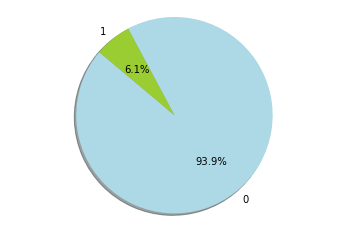

In [8]:
labels = '0', '1'
sizes = df['class'].value_counts()
colors = ['lightblue', 'yellowgreen']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### 2.3. Histogram of features

<ipython-input-9-6ab3c773f517>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


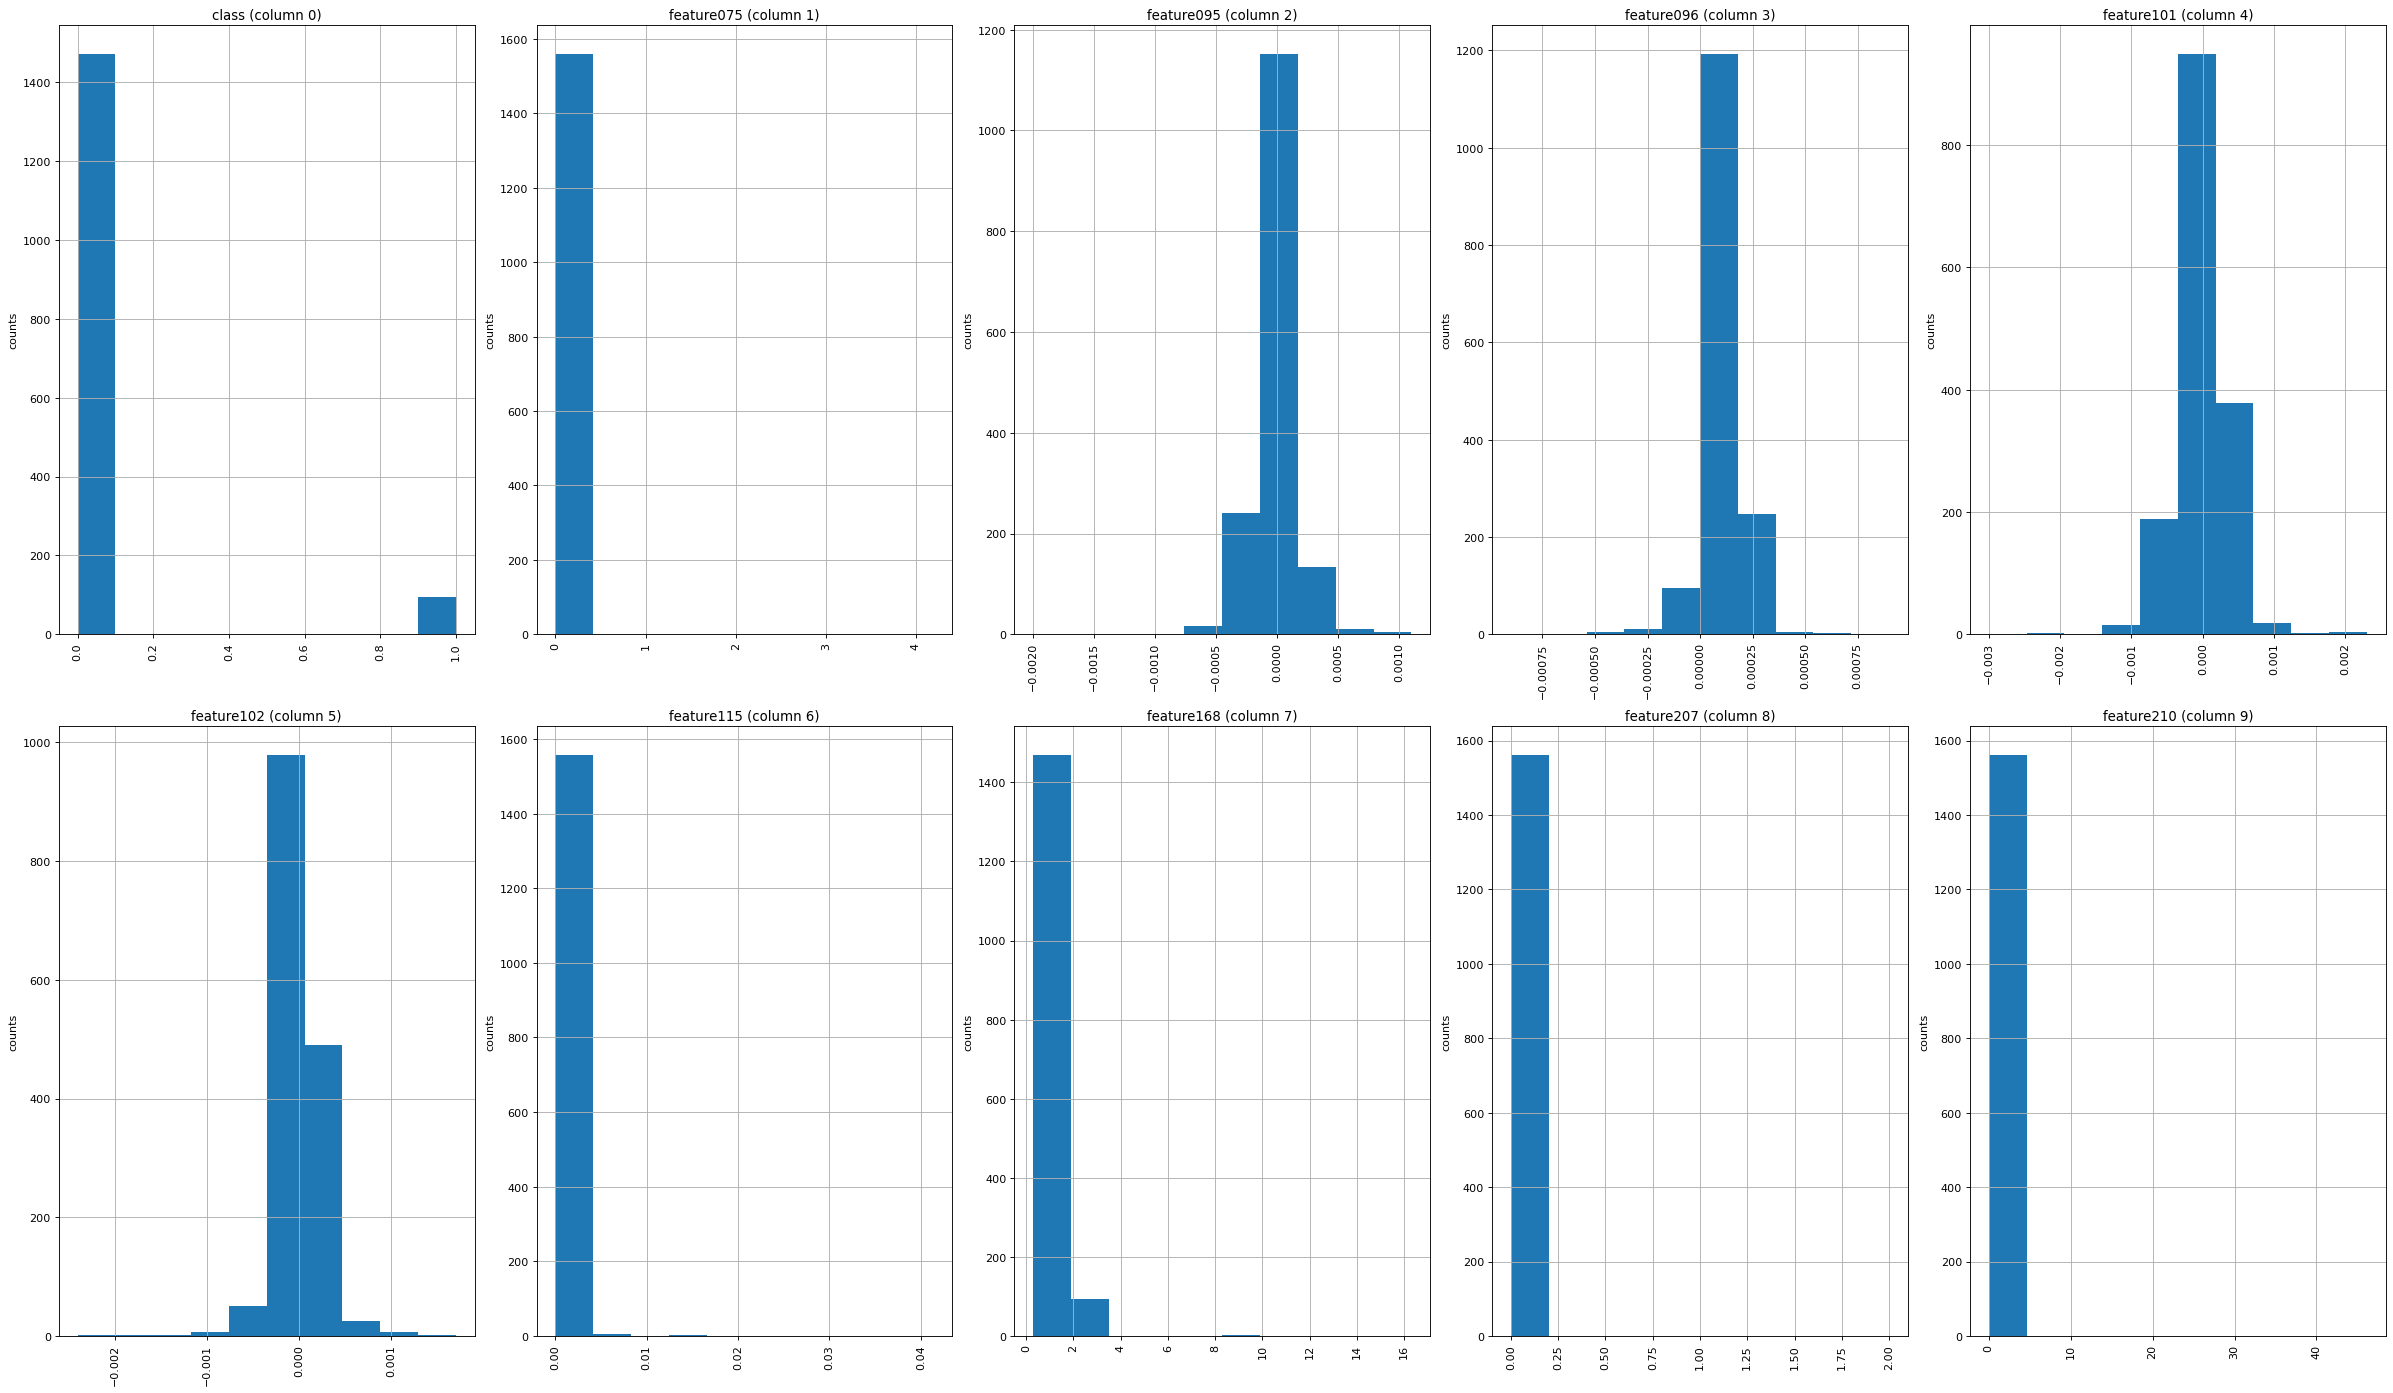

In [9]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 10, 5)

#### 2.4. Correlation

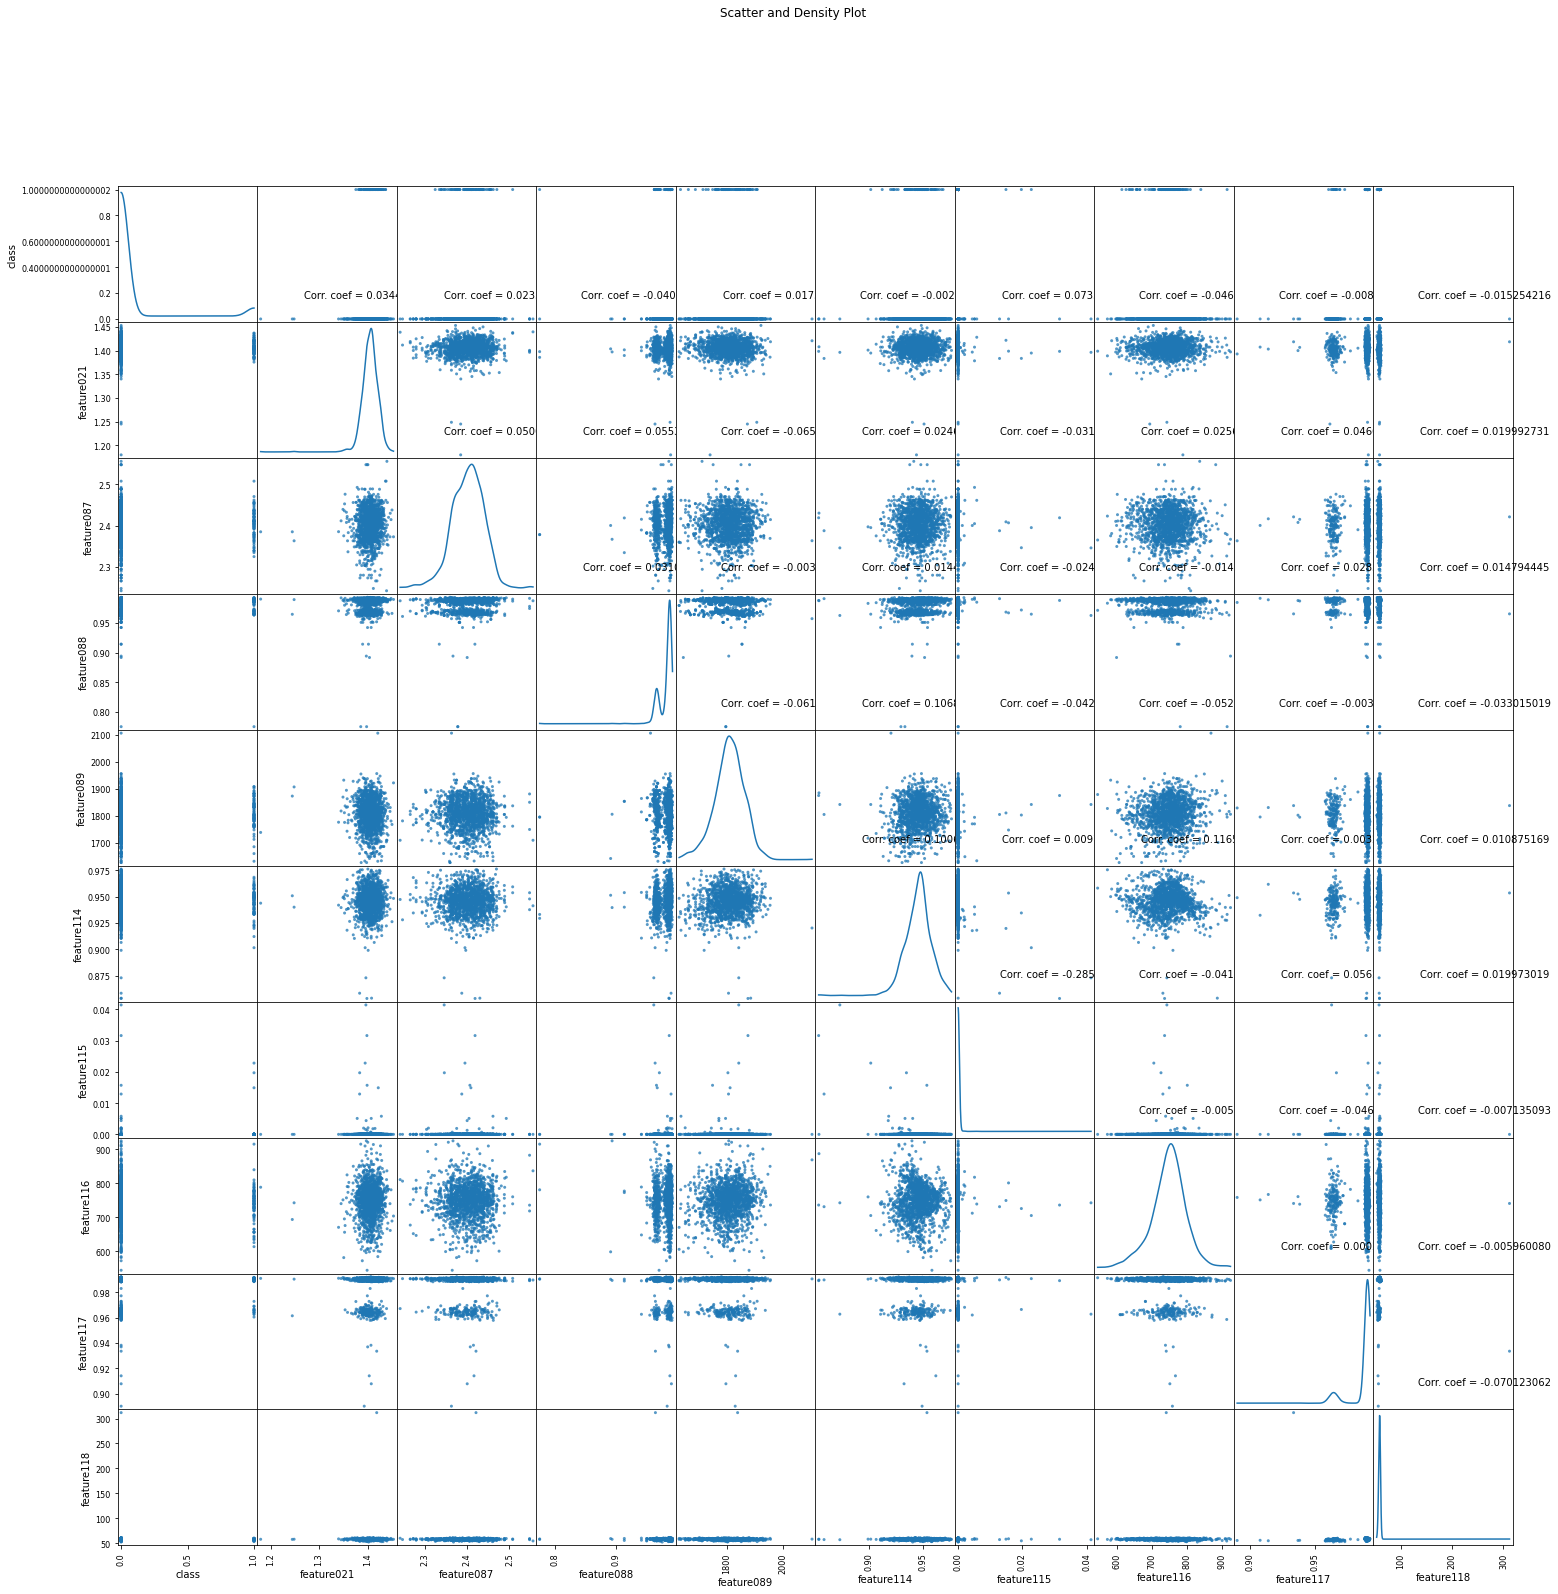

In [10]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %0.9f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
plotScatterMatrix(df, 25, 10)

<ipython-input-11-1acfc8f4476d>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)))


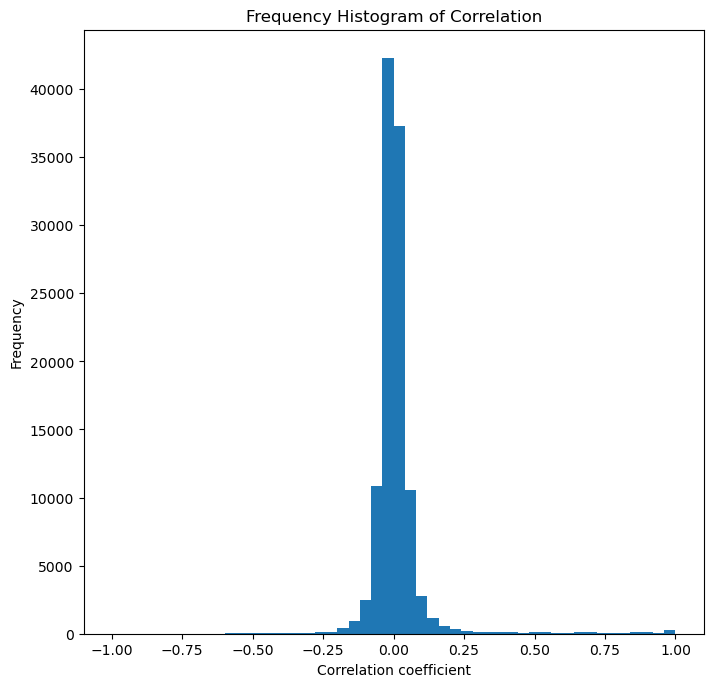

In [11]:
# Correlation Histogram


cor_matrix = pd.DataFrame(df.corr())

# Heatmap of correlation
#cor_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


# Remove reuntant values by selecting only the upper correlation triangle
upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)))

# Convert the upper correlation triangle to a Series
corlist = pd.Series(upper_tri.values.ravel('F'))

# Correlation Histogram
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

# Plot Histogram on x
plt.hist(corlist, bins =50)
plt.gca().set(title='Frequency Histogram of Correlation', ylabel='Frequency', xlabel='Correlation coefficient');

#### 2.5. Missing values

In [12]:
#Total numbe rof Nan values in the dataframe
df.isna().sum().sum()

41951

In [13]:
#number of cols with Nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print('Nan_cols = ', len(nan_cols))

#number of rows with Nan values
nan_rows = df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows
print('Nan_rows = ', len(nan_rows))

Nan_cols =  538
Nan_rows =  1567


## 3. Preprocessing

In [14]:
# Change class labels
df.rename(columns ={'class':'Pass/Fail'},inplace=True)

In [15]:
df

Pass/Fail            timestamp  feature001  feature002  feature003  \
ID                                                                           
1.0           0.0  19/07/2008 11:55:00     3030.93     2564.00   2187.7333   
2.0           0.0  19/07/2008 12:32:00     3095.78     2465.14   2230.4222   
3.0           1.0  19/07/2008 13:17:00     2932.61     2559.94   2186.4111   
4.0           0.0  19/07/2008 14:43:00     2988.72     2479.90   2199.0333   
5.0           0.0  19/07/2008 15:22:00     3032.24     2502.87   2233.3667   
...           ...                  ...         ...         ...         ...   
1563.0        0.0  16/10/2008 15:13:00     2899.41     2464.36   2179.7333   
1564.0        0.0  16/10/2008 20:49:00     3052.31     2522.55   2198.5667   
1565.0        0.0  17/10/2008 05:26:00     2978.81     2379.78   2206.3000   
1566.0        0.0  17/10/2008 06:01:00     2894.92     2532.01   2177.0333   
1567.0        0.0  17/10/2008 06:07:00     2944.92     2450.76   2195.4444   

        feature004  feature005  feature006  feature007  feature008  ...  \
ID                                                                  ...   
1.0      1411.1265      1.3602       100.0     97.6133      0.1242  ...   
2.0      1463.6606      0.8294       100.0    102.3433      0.1247  ...   
3.0      1698.0172      1.5102       100.0     95.4878      0.1241  ...   
4.0       909.7926      1.3204       100.0    104.2367      0.1217  ...   
5.0      1326.5200      1.5334       100.0    100.3967      0.1235  ...   
...            ...         ...         ...         ...         ...  ...   
1563.0   3085.3781      1.4843       100.0     82.2467      0.1248  ...   
1564.0   1124.6595      0.8763       100.0     98.4689      0.1205  ...   
1565.0   1110.4967      0.8236       100.0     99.4122      0.1208  ...   
1566.0   1183.7287      1.5726       100.0     98.7978      0.1213  ...   
1567.0   2914.1792      1.5978       100.0     85.1011      0.1235  ...   

        feature581  feature582  feature583  feature584  feature585  \
ID                                                                   
1.0            NaN         NaN      0.5005      0.0118      0.0035   
2.0         0.0060    208.2045      0.5019      0.0223      0.0055   
3.0         0.0148     82.8602      0.4958      0.0157      0.0039   
4.0         0.0044     73.8432      0.4990      0.0103      0.0025   
5.0            NaN         NaN      0.4800      0.4766      0.1045   
...            ...         ...         ...         ...         ...   
1563.0      0.0047    203.1720      0.4988      0.0143      0.0039   
1564.0         NaN         NaN      0.4975      0.0131      0.0036   
1565.0      0.0025     43.5231      0.4987      0.0153      0.0041   
1566.0      0.0075     93.4941      0.5004      0.0178      0.0038   
1567.0      0.0045    137.7844      0.4987      0.0181      0.0040   

        feature586  feature587  feature588  feature589  feature590  
ID                                                                  
1.0         2.3630         NaN         NaN         NaN         NaN  
2.0         4.4447      0.0096      0.0201      0.0060    208.2045  
3.0         3.1745      0.0584      0.0484      0.0148     82.8602  
4.0         2.0544      0.0202      0.0149      0.0044     73.8432  
5.0        99.3032      0.0202      0.0149      0.0044     73.8432  
...            ...         ...         ...         ...         ...  
1563.0      2.8669      0.0068      0.0138      0.0047    203.1720  
1564.0      2.6238      0.0068      0.0138      0.0047    203.1720  
1565.0      3.0590      0.0197      0.0086      0.0025     43.5231  
1566.0      3.5662      0.0262      0.0245      0.0075     93.4941  
1567.0      3.6275      0.0117      0.0162      0.0045    137.7844  

[1567 rows x 592 columns]

In [16]:
# Give text labels to the training examples
df['Pass/Fail'] = df['Pass/Fail'].replace({0: "PASS", 1: "FAIL"})
df.tail()

Pass/Fail            timestamp  feature001  feature002  feature003  \
ID                                                                          
1563.0      PASS  16/10/2008 15:13:00     2899.41     2464.36   2179.7333   
1564.0      PASS  16/10/2008 20:49:00     3052.31     2522.55   2198.5667   
1565.0      PASS  17/10/2008 05:26:00     2978.81     2379.78   2206.3000   
1566.0      PASS  17/10/2008 06:01:00     2894.92     2532.01   2177.0333   
1567.0      PASS  17/10/2008 06:07:00     2944.92     2450.76   2195.4444   

        feature004  feature005  feature006  feature007  feature008  ...  \
ID                                                                  ...   
1563.0   3085.3781      1.4843       100.0     82.2467      0.1248  ...   
1564.0   1124.6595      0.8763       100.0     98.4689      0.1205  ...   
1565.0   1110.4967      0.8236       100.0     99.4122      0.1208  ...   
1566.0   1183.7287      1.5726       100.0     98.7978      0.1213  ...   
1567.0   2914.1792      1.5978       100.0     85.1011      0.1235  ...   

        feature581  feature582  feature583  feature584  feature585  \
ID                                                                   
1563.0      0.0047    203.1720      0.4988      0.0143      0.0039   
1564.0         NaN         NaN      0.4975      0.0131      0.0036   
1565.0      0.0025     43.5231      0.4987      0.0153      0.0041   
1566.0      0.0075     93.4941      0.5004      0.0178      0.0038   
1567.0      0.0045    137.7844      0.4987      0.0181      0.0040   

        feature586  feature587  feature588  feature589  feature590  
ID                                                                  
1563.0      2.8669      0.0068      0.0138      0.0047    203.1720  
1564.0      2.6238      0.0068      0.0138      0.0047    203.1720  
1565.0      3.0590      0.0197      0.0086      0.0025     43.5231  
1566.0      3.5662      0.0262      0.0245      0.0075     93.4941  
1567.0      3.6275      0.0117      0.0162      0.0045    137.7844  

[5 rows x 592 columns]

## 4. Data Preparation

### 4.1.Splitting Traninig and Test Data

In [17]:
# Split df into X and y
y = df['Pass/Fail']
X = df.drop('Pass/Fail', axis=1)

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=40, stratify=y)

In [19]:
#to check if the test and train data also has the same pass/fail ratio

fig = px.pie(
    y_train.value_counts(),
    values='Pass/Fail',
    names=["PASS", "FAIL"],
    title="Class Distribution of Train data",
    width=500
)

fig.show()



import plotly.express as px
fig = px.pie(
    y_test.value_counts(),
    values='Pass/Fail',
    names=["PASS", "FAIL"],
    title="Class Distribution of Test data",
    width=500
)

fig.show()

Keeping test data aside. Using only X_train and y_train


### 4.2 Reducing dimensionality of data by feature removal

#### 4.2.1 Removal of timestamp and constants

In [20]:
# removing timestamp
X_train= X_train.drop(columns='timestamp')

In [21]:
#coloumns that have the same value excluding nan
print(len(X_train.columns[X_train.nunique() == 1]))

#column names with same value in it
X_train.columns[X_train.nunique() == 1]
print(list(X_train.columns[X_train.nunique() == 1]))

#remove these columns since it adds no value
single_value_coloumns = list(X_train.columns[X_train.nunique() == 1])
X_train=X_train.drop(columns=single_value_coloumns)
X_train

116
['feature006', 'feature014', 'feature043', 'feature050', 'feature053', 'feature070', 'feature098', 'feature142', 'feature150', 'feature179', 'feature180', 'feature187', 'feature190', 'feature191', 'feature192', 'feature193', 'feature194', 'feature195', 'feature227', 'feature230', 'feature231', 'feature232', 'feature233', 'feature234', 'feature235', 'feature236', 'feature237', 'feature238', 'feature241', 'feature242', 'feature243', 'feature244', 'feature257', 'feature258', 'feature259', 'feature260', 'feature261', 'feature262', 'feature263', 'feature264', 'feature265', 'feature266', 'feature267', 'feature277', 'feature285', 'feature314', 'feature315', 'feature316', 'feature323', 'feature326', 'feature327', 'feature328', 'feature329', 'feature330', 'feature331', 'feature365', 'feature370', 'feature371', 'feature372', 'feature373', 'feature374', 'feature375', 'feature376', 'feature379', 'feature380', 'feature381', 'feature382', 'feature395', 'feature396', 'feature397', 'feature398', '

feature001  feature002  feature003  feature004  feature005  \
ID                                                                   
567.0      3023.07     2484.55   2242.8555   1430.7270      0.8832   
1261.0     2953.63     2384.04   2191.2111   1437.5003      2.2073   
1041.0     3021.61     2440.29   2227.2222   2043.5876      1.1892   
1181.0     3093.46     2479.17   2221.3667   2490.6947      1.2667   
611.0      3010.40         NaN   2172.4000   1148.4101      1.2614   
...            ...         ...         ...         ...         ...   
806.0      2952.31     2453.53   2188.7222   1325.5230      1.1721   
1101.0     2880.58     2489.76   2256.6000   2365.4787      1.1384   
1469.0     2968.78     2451.53   2207.1000   1298.4309      1.0251   
234.0      2958.39     2478.99   2231.9556   1185.0959      1.0208   
645.0      3072.21     2610.62   2214.9333   1663.7024      1.0203   

        feature007  feature008  feature009  feature010  feature011  ...  \
ID                                                                  ...   
567.0     106.2100      0.1216      1.5613     -0.0028      0.0008  ...   
1261.0     97.6444      0.1235      1.3584     -0.0024     -0.0048  ...   
1041.0     95.5267      0.1253      1.5335     -0.0083     -0.0095  ...   
1181.0     88.6578      0.1220      1.3537      0.0134     -0.0039  ...   
611.0     102.4522      0.1227      1.3843     -0.0010     -0.0004  ...   
...            ...         ...         ...         ...         ...  ...   
806.0     105.1700      0.1250      1.4480     -0.0233      0.0087  ...   
1101.0     85.4278      0.1205      1.6114      0.0484      0.0043  ...   
1469.0     96.9478      0.1203      1.3985     -0.0105     -0.0140  ...   
234.0     102.5344      0.1192      1.4881     -0.0054     -0.0037  ...   
645.0     100.4456      0.1247      1.4403     -0.0169      0.0213  ...   

        feature581  feature582  feature583  feature584  feature585  \
ID                                                                   
567.0          NaN         NaN      0.4979      0.0165      0.0041   
1261.0         NaN         NaN      0.4968      0.0188      0.0041   
1041.0         NaN         NaN      0.5091      0.0123      0.0031   
1181.0         NaN         NaN      0.5006      0.0148      0.0036   
611.0          NaN         NaN      0.5015      0.0137      0.0034   
...            ...         ...         ...         ...         ...   
806.0          NaN         NaN      0.4949      0.0155      0.0034   
1101.0      0.0076     50.7949      0.5032      0.0117      0.0029   
1469.0      0.0084    185.3578      0.4972      0.0133      0.0036   
234.0          NaN         NaN      0.5024      0.0151      0.0038   
645.0       0.0034     50.0650      0.5044      0.0139      0.0037   

        feature586  feature587  feature588  feature589  feature590  
ID                                                                  
567.0       3.3098      0.0184      0.0127      0.0037     68.7057  
1261.0      3.7853      0.0137      0.0326      0.0108    237.4625  
1041.0      2.4116      0.0437      0.0200      0.0074     45.7019  
1181.0      2.9659      0.0190      0.0150      0.0045     78.6525  
611.0       2.7339      0.0252      0.0157      0.0046     62.3881  
...            ...         ...         ...         ...         ...  
806.0       3.1238      0.0253      0.0058      0.0018     22.7661  
1101.0      2.3282      0.0398      0.0202      0.0076     50.7949  
1469.0      2.6718      0.0167      0.0310      0.0084    185.3578  
234.0       3.0084     -0.0034      0.0093      0.0030    272.3477  
645.0       2.7602      0.0211      0.0106      0.0034     50.0650  

[1253 rows x 474 columns]

#### 4.2.3. Checking for columns more than 55% nan values

In [22]:
# count the number of missing values for each column
num_missing = pd.DataFrame((X_train.isna()).sum())
print(num_missing.sort_values(0))

               0
feature360     0
feature223     0
feature224     0
feature249     0
feature250     0
...          ...
feature359  1078
feature294  1140
feature158  1140
feature159  1140
feature293  1140

[474 rows x 1 columns]


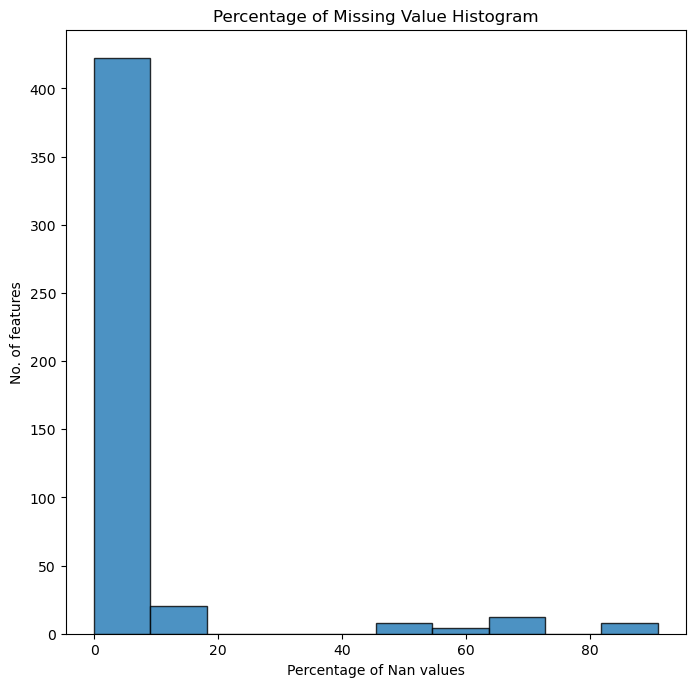

In [23]:
#Missing Value histogram
nan_perc = pd.DataFrame(round((X_train.isnull().sum() * 100/ len(X_train)),2))
nan_perc = nan_perc.reset_index()
nan_perc = nan_perc.rename({'index': 'feature', 0: 'percentage'}, axis=1)

%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
n,bins,patch = plt.hist(nan_perc['percentage'],bins=10, alpha=0.8, label='Value', edgecolor='black', linewidth=1)
plt.gca().set(title='Percentage of Missing Value Histogram', ylabel='No. of features', xlabel='Percentage of Nan values');
plt.show()

In [24]:
# Defining a threshold to remove the values above it
threshold= 0.55
pct_null = X_train.isnull().sum() / len(X_train)
missing_value_cols = pct_null[pct_null >= threshold].index

print(len(missing_value_cols))
print(missing_value_cols)

X_train = X_train.drop(missing_value_cols, axis=1)

24
Index(['feature086', 'feature110', 'feature111', 'feature112', 'feature158',
       'feature159', 'feature221', 'feature245', 'feature246', 'feature247',
       'feature293', 'feature294', 'feature359', 'feature383', 'feature384',
       'feature385', 'feature493', 'feature517', 'feature518', 'feature519',
       'feature579', 'feature580', 'feature581', 'feature582'],
      dtype='object')


#### 4.2.5. Less volatile

In [25]:
#exploring  emaining features
summary = X_train.iloc[:,:].describe(include='all')
print(summary)


        feature001   feature002   feature003   feature004   feature005  \
count  1249.000000  1247.000000  1242.000000  1242.000000  1242.000000   
mean   3014.070961  2495.654419  2200.025057  1392.454440     4.017364   
std      73.651767    80.939817    29.195659   445.082171    54.595810   
min    2770.400000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.390000  2452.000000  2180.986050  1081.822175     1.005075   
50%    3011.490000  2498.300000  2200.233300  1281.786200     1.317100   
75%    3055.970000  2538.745000  2217.811100  1588.509000     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

        feature007   feature008   feature009   feature010   feature011  ...  \
count  1242.000000  1248.000000  1252.000000  1252.000000  1252.000000  ...   
mean    101.174591     0.121789     1.462431    -0.000561     0.000013  ...   
std       6.187379     0.009346     0.073497     0.015345     0.009408  ...   
min      82.13110

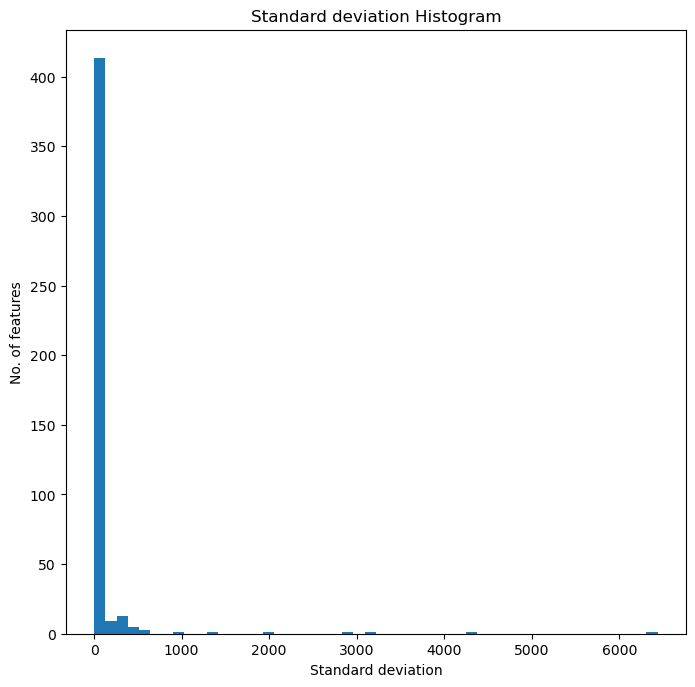

In [26]:
#checking std of remaining features
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

plt.hist(X_train.std(), bins = 50)
plt.gca().set(title='Standard deviation Histogram', ylabel='No. of features', xlabel='Standard deviation');
plt.show()

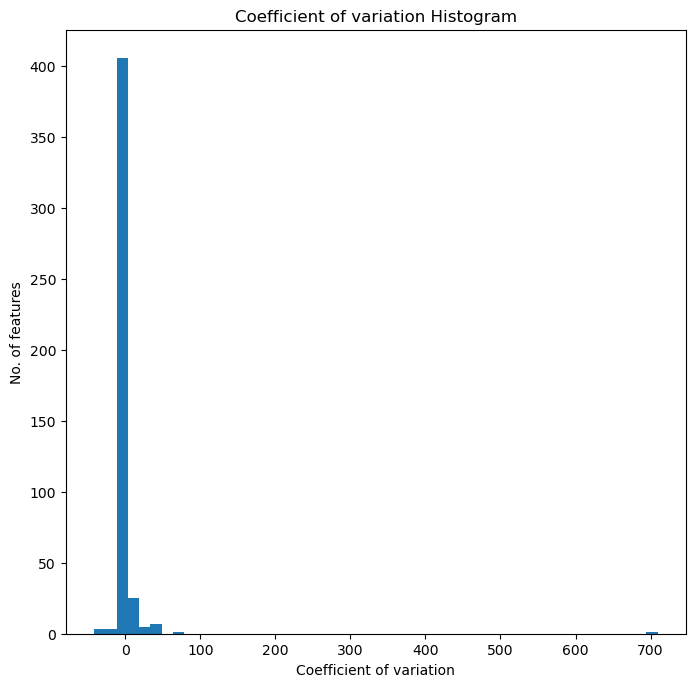

In [27]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

plt.hist(X_train.std()/X_train.mean(), bins = 50)
plt.gca().set(title='Coefficient of variation Histogram', ylabel='No. of features', xlabel='Coefficient of variation');
plt.show()

In [28]:
# Checking for coeff of variation
feature_std = pd.DataFrame(summary.loc['std',:])
feature_coeffstd = pd.DataFrame(summary.loc['std',:]/summary.loc['mean',:])

#Max- min of stdev and coeff of variation
print("Min-max of stdev")
print('Min of stdev = ',min(feature_std.iloc[:,0]))
print('Max of stdev = ',max(feature_std.iloc[:,0]))

print ("\n")
print("Min-max of coeff of variation")
print('Min of coeff of variation = ', min(feature_coeffstd.iloc[:,0]))
print('Max of coeff of variation = ', max(feature_coeffstd.iloc[:,0]))



Min-max of stdev
Min of stdev =  0.0001055328779148529
Max of stdev =  6438.937158652618


Min-max of coeff of variation
Min of coeff of variation =  -41.758756062763496
Max of coeff of variation =  709.586291505058


### 4.3 Outlier Identification

In [29]:
# calculating the z score of the values
from scipy import stats
import stat
z_x_train= pd.DataFrame(stats.zscore(X_train,nan_policy='omit'))

# calculating the number of outliers
sum(z_x_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0))))

4938

In [30]:
#NA values in the dataset
X_train.isna().sum().sum()

11193

In [31]:
X_train = X_train.mask(X_train.sub(X_train.mean()).div(X_train.std()).abs().gt(3), np.nan)

In [32]:
X_train.loc[:][:]

feature001  feature002  feature003  feature004  feature005  \
ID                                                                   
567.0      3023.07     2484.55   2242.8555   1430.7270      0.8832   
1261.0     2953.63     2384.04   2191.2111   1437.5003      2.2073   
1041.0     3021.61     2440.29   2227.2222   2043.5876      1.1892   
1181.0     3093.46     2479.17   2221.3667   2490.6947      1.2667   
611.0      3010.40         NaN   2172.4000   1148.4101      1.2614   
...            ...         ...         ...         ...         ...   
806.0      2952.31     2453.53   2188.7222   1325.5230      1.1721   
1101.0     2880.58     2489.76   2256.6000   2365.4787      1.1384   
1469.0     2968.78     2451.53   2207.1000   1298.4309      1.0251   
234.0      2958.39     2478.99   2231.9556   1185.0959      1.0208   
645.0      3072.21     2610.62   2214.9333   1663.7024      1.0203   

        feature007  feature008  feature009  feature010  feature011  ...  \
ID                                                                  ...   
567.0     106.2100      0.1216      1.5613     -0.0028      0.0008  ...   
1261.0     97.6444      0.1235      1.3584     -0.0024     -0.0048  ...   
1041.0     95.5267      0.1253      1.5335     -0.0083     -0.0095  ...   
1181.0     88.6578      0.1220      1.3537      0.0134     -0.0039  ...   
611.0     102.4522      0.1227      1.3843     -0.0010     -0.0004  ...   
...            ...         ...         ...         ...         ...  ...   
806.0     105.1700      0.1250      1.4480     -0.0233      0.0087  ...   
1101.0     85.4278      0.1205      1.6114         NaN      0.0043  ...   
1469.0     96.9478      0.1203      1.3985     -0.0105     -0.0140  ...   
234.0     102.5344      0.1192      1.4881     -0.0054     -0.0037  ...   
645.0     100.4456      0.1247      1.4403     -0.0169      0.0213  ...   

        feature577  feature578  feature583  feature584  feature585  \
ID                                                                   
567.0       1.1395     17.5289      0.4979      0.0165      0.0041   
1261.0         NaN         NaN      0.4968      0.0188      0.0041   
1041.0      1.5180     16.7005      0.5091      0.0123      0.0031   
1181.0      1.4926     14.3055      0.5006      0.0148      0.0036   
611.0       1.6264     23.2761      0.5015      0.0137      0.0034   
...            ...         ...         ...         ...         ...   
806.0       1.7048     16.6976      0.4949      0.0155      0.0034   
1101.0      1.6892     14.6674      0.5032      0.0117      0.0029   
1469.0      1.3708     18.3819      0.4972      0.0133      0.0036   
234.0       1.2492      6.3989      0.5024      0.0151      0.0038   
645.0       1.3033     17.0534      0.5044      0.0139      0.0037   

        feature586  feature587  feature588  feature589  feature590  
ID                                                                  
567.0       3.3098      0.0184      0.0127      0.0037     68.7057  
1261.0      3.7853      0.0137      0.0326      0.0108    237.4625  
1041.0      2.4116      0.0437      0.0200      0.0074     45.7019  
1181.0      2.9659      0.0190      0.0150      0.0045     78.6525  
611.0       2.7339      0.0252      0.0157      0.0046     62.3881  
...            ...         ...         ...         ...         ...  
806.0       3.1238      0.0253      0.0058      0.0018     22.7661  
1101.0      2.3282      0.0398      0.0202      0.0076     50.7949  
1469.0      2.6718      0.0167      0.0310      0.0084    185.3578  
234.0       3.0084     -0.0034      0.0093      0.0030    272.3477  
645.0       2.7602      0.0211      0.0106      0.0034     50.0650  

[1253 rows x 450 columns]

In [33]:
X_train.isna().sum().sum()

16125

### 4.4 Missing value Imputation

#### Regression Imputation

#### Hot deck

#### KNN

In [34]:
from sklearn.impute import KNNImputer
KNN_imputer = KNNImputer(n_neighbors=5)
X_KNN = X_train.copy(deep=True)
X_KNN.iloc[:,:] = KNN_imputer.fit_transform(X_KNN)

In [35]:
X_KNN.isna().sum().sum()

0

#### MICE

In [36]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MICE_imputer = IterativeImputer(max_iter=10, random_state=0)
X_MICE = X_train.copy(deep=True)
X_MICE.iloc[:,:] = MICE_imputer.fit_transform(X_MICE)


C:\Users\s0576758\.conda\envs\ML\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [37]:
X_MICE.isna().sum().sum()

0

### Evaluation of imputation

Text(0.5, 0, 'feature347')

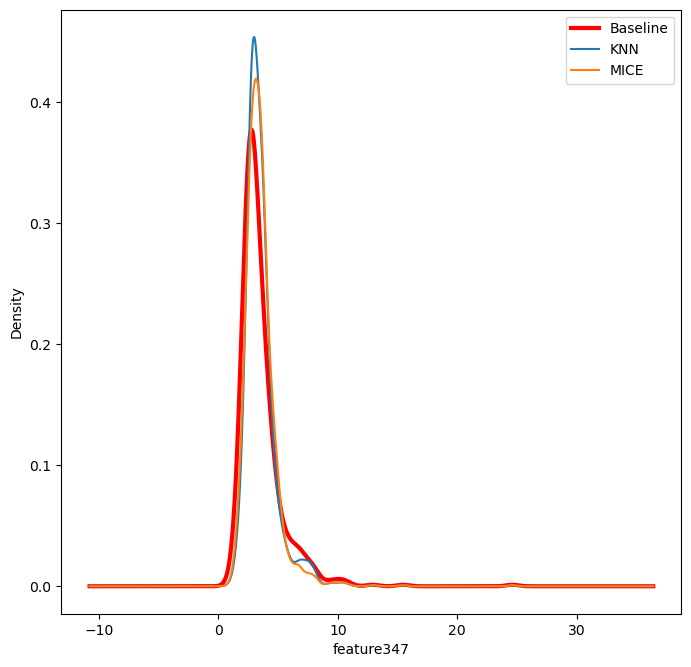

In [38]:
#density plots

X_train['feature347'].plot(kind='kde',c='red',linewidth=3)
X_KNN['feature347'].plot(kind='kde')
X_MICE['feature347'].plot(kind='kde')
labels = ['Baseline', 'KNN','MICE']
plt.legend(labels)
plt.xlabel('feature347')

### 4.5 Feature Selection

#### Boruta

In [39]:
conda install -c conda-forge boruta_py

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.ensemble import RandomForestClassifier

import numpy as np
feature_names = np.array(X_MICE.columns)

# define random forest classifier
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
model.fit(X_MICE, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [41]:
# Define XGBOOST classifier to be used by Boruta
#import xgboost as xgb
#model = xgb.XGBClassifier()  #For Boruta

In [42]:
from boruta import BorutaPy

# define Boruta feature selection method
feature_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feature_selector.fit(X_MICE.to_numpy(),y_train)

# check selected features
feature_selector.support_

# check ranking of features
feature_selector.ranking_



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	450
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	422
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	26
Rejected: 	422
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	26
Rejected: 	422
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	26
Rejected: 	422
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	20
Rejected: 	424
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	20
Rejected: 	424
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	20
Rejected: 	424
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	20
Rejected: 	424
Iteration: 	16 / 100
Confirmed: 	7
Tentat

array([ 11, 381, 372, 315, 117,  26, 211, 121, 293, 276, 132, 135,  36,
       102,  55, 309, 171,  62, 143, 157, 409, 267, 355, 236, 154, 239,
         2, 268, 262,  48, 126,   1,  59,   6,  49,   2, 260, 138,   1,
        30, 282, 137, 129, 286, 274,  72, 271, 228, 396, 284,  39,  38,
       378,  84,   1, 401,  43, 188,  91,   1,   1, 248, 127, 222, 257,
       201, 297, 226, 424, 207,  17, 194, 113,  15, 156, 260, 203, 300,
       379, 329, 318, 288,  77,  16,  13, 197,  47, 414, 410, 232, 192,
       373,  41, 407,  12,   1, 365, 174,  51, 266, 334,   1, 256, 418,
        29, 383, 292, 112, 161, 230,   2,   8,  79,   1,   1,   1,  20,
        96,  14,   1, 111, 151,  66, 163,  95, 353,  75, 399, 160, 351,
       411, 368, 189, 399, 370,  57, 185, 251, 337,   2,  71, 319, 129,
        86, 187,   1, 309, 275, 123, 135, 204, 393, 393, 305, 295, 115,
       175, 106, 108,  89,  74,  28, 366,  81, 148,   2, 163, 219, 301,
       291,  23,  88, 385, 169, 322, 349,  41, 343, 119, 183, 25

In [43]:
# call transform() on X to filter it down to selected features
X_filtered = pd.DataFrame(feature_selector.transform(X_MICE.to_numpy()))


# zip feature names, ranks, and decisions 
feature_ranks = list(zip(feature_names, 
                         feature_selector.ranking_, 
                         feature_selector.support_))

# print the results
for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: feature001                     Rank: 11,  Keep: False
Feature: feature002                     Rank: 381,  Keep: False
Feature: feature003                     Rank: 372,  Keep: False
Feature: feature004                     Rank: 315,  Keep: False
Feature: feature005                     Rank: 117,  Keep: False
Feature: feature007                     Rank: 26,  Keep: False
Feature: feature008                     Rank: 211,  Keep: False
Feature: feature009                     Rank: 121,  Keep: False
Feature: feature010                     Rank: 293,  Keep: False
Feature: feature011                     Rank: 276,  Keep: False
Feature: feature012                     Rank: 132,  Keep: False
Feature: feature013                     Rank: 135,  Keep: False
Feature: feature015                     Rank: 36,  Keep: False
Feature: feature016                     Rank: 102,  Keep: False
Feature: feature017                     Rank: 55,  Keep: False
Feature: feature018                     Rank

In [44]:
final_features = list()
indexes = np.where(feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(feature_names[x])
print(final_features)

['feature034', 'feature041', 'feature060', 'feature065', 'feature066', 'feature104', 'feature113', 'feature125', 'feature126', 'feature127', 'feature131', 'feature161', 'feature248', 'feature296', 'feature432', 'feature461', 'feature478', 'feature511', 'feature520']


In [45]:
X_train_MICE_boruta = X_MICE.filter(final_features)
X_train_MICE_boruta

feature034  feature041  feature060  feature065  feature066  \
ID                                                                   
567.0       8.5288      78.520      1.4845     18.5155     25.4260   
1261.0      9.0402       8.438      1.7273     18.2727     22.1740   
1041.0      8.8581      13.600     -3.7509     23.7509     30.7593   
1181.0      8.7782      81.400      1.3555     18.6445     22.2300   
611.0       8.5615      79.000      2.3900     17.6100     25.5921   
...            ...         ...         ...         ...         ...   
806.0       8.5862      80.260     -3.1227     23.1227     31.4849   
1101.0      8.9818      12.940      0.1982     19.8018     23.4628   
1469.0      8.6384      78.330      1.2518     18.7482     24.1495   
234.0       8.5177      77.140    -10.2673     30.2673     35.9269   
645.0       9.2016      76.880      0.0855     19.9145     29.0850   

        feature104  feature113  feature125  feature126  feature127  \
ID                                                                   
567.0      -0.0146    0.455500       15.77      0.9649       2.888   
1261.0     -0.0124    0.457152       16.08      1.1540       2.627   
1041.0     -0.0086    0.459172       15.71      1.8340       2.658   
1181.0     -0.0107    0.468000       15.64      1.0210       2.792   
611.0      -0.0095    0.461960       15.94      0.8845       2.748   
...            ...         ...         ...         ...         ...   
806.0      -0.0111    0.442000       15.54      1.2390       2.511   
1101.0     -0.0116    0.459221       15.77      1.4650       2.920   
1469.0     -0.0112    0.456935       15.61      1.3800       2.765   
234.0      -0.0052    0.466420       15.83      1.0020       2.798   
645.0      -0.0071    0.464390       15.95      0.9554       2.892   

        feature131  feature161  feature248  feature296  feature432  \
ID                                                                   
567.0       0.6627       374.0    0.019500    168.1031     13.6996   
1261.0      0.7492       227.0    0.042108    100.6525      8.9011   
1041.0      0.5042       225.0    0.050711     97.2193      8.6034   
1181.0      0.7931       242.0    0.021000    106.9279      9.2676   
611.0       0.8080       418.0    0.047057    204.2392     15.7706   
...            ...         ...         ...         ...         ...   
806.0       0.6847      1047.0    0.222300    434.9291     38.7634   
1101.0      0.8037       447.0    0.054625    206.0362     16.7588   
1469.0      0.7248        59.0    0.041297     32.6637      2.6616   
234.0       0.8187       813.0    0.056569    344.7211     26.4648   
645.0       0.7527       588.0    0.042102    259.4306     19.1422   

        feature461  feature478  feature511  feature520  
ID                                                      
567.0      22.7157      2.3095     62.3288    4.272400  
1261.0     32.6879      3.4184     21.8402    9.267442  
1041.0     21.7993      3.3690     39.7080   11.125211  
1181.0     36.7423      4.8659     20.4651    4.490400  
611.0      15.0259      2.9332     68.7831   10.020679  
...            ...         ...         ...         ...  
806.0      16.1068      4.6652     45.9459   50.293500  
1101.0     18.7968      2.5177     33.6207   12.034589  
1469.0     31.6738      4.0841     50.7795    9.540912  
234.0      49.2352      9.8766     57.4163   11.992300  
645.0      17.0958      7.3841     77.6014    9.279558  

[1253 rows x 19 columns]

#### 4.5.1 Overview of remaining features


In [46]:
# Descriptive statistics
X_train_MICE_boruta.describe()

feature034   feature041   feature060   feature065   feature066  \
count  1253.000000  1253.000000  1253.000000  1253.000000  1253.000000   
mean      8.823865    68.001375     2.737768    20.506136    26.693448   
std       0.399682    23.843488     8.159262     4.926804     7.698745   
min       7.603200     1.434000   -21.205500     6.448200  -143.722209   
25%       8.578800    74.480000    -1.890000    17.362700    22.997000   
50%       8.769746    78.290000     0.860000    20.018200    26.247000   
75%       9.035500    80.260000     4.381800    22.861800    29.921200   
max      10.963400    86.120000    29.750900    47.807976    52.664246   

        feature104   feature113   feature125   feature126   feature127  \
count  1253.000000  1253.000000  1253.000000  1253.000000  1253.000000   
mean     -0.009805     0.462039    15.796083     1.183283     2.731285   
std       0.002825     0.005850     0.113442     0.267183     0.204316   
min      -0.018500     0.398900    15.470000     0.605500     2.340000   
25%      -0.011800     0.459300    15.730000     0.974400     2.572000   
50%      -0.010100     0.462062    15.780000     1.144000     2.734000   
75%      -0.008100     0.464929    15.870000     1.338000     2.857000   
max      -0.000700     0.488500    16.090000     2.022000     3.463000   

        feature131   feature161   feature248   feature296   feature432  \
count  1253.000000  1253.000000  1253.000000  1253.000000  1253.000000   
mean      0.746759   488.910160     0.046702   217.728662    17.713027   
std       0.080816   362.599090     0.037307   160.832842    12.492011   
min       0.501300    28.000000     0.000000    13.622900     1.239100   
25%       0.688700   295.000000     0.025100   130.306100    11.056900   
50%       0.758600   433.000000     0.042444   193.904600    16.216800   
75%       0.818700   608.000000     0.049784   269.501200    21.295400   
max       0.888400  3386.053779     0.252673  1508.369176   119.356000   

        feature461   feature478   feature511   feature520  
count  1253.000000  1253.000000  1253.000000  1253.000000  
mean     29.055408     5.653931    52.239121    10.097836  
std      12.251425     2.591880    24.424058     8.058553  
min       7.953400   -35.174570     0.000000     0.000000  
25%      20.363900     4.091100    35.320100     5.429400  
50%      26.311100     5.254600    47.276100     9.267442  
75%      35.748700     6.679000    63.378200    10.816927  
max      90.642456    23.100200   160.493800    59.664900

In [47]:
#datatype and shape
print(X_train_MICE_boruta.info())
print(X_train_MICE_boruta.shape)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1253 entries, 567.0 to 645.0
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature034  1253 non-null   float64
 1   feature041  1253 non-null   float64
 2   feature060  1253 non-null   float64
 3   feature065  1253 non-null   float64
 4   feature066  1253 non-null   float64
 5   feature104  1253 non-null   float64
 6   feature113  1253 non-null   float64
 7   feature125  1253 non-null   float64
 8   feature126  1253 non-null   float64
 9   feature127  1253 non-null   float64
 10  feature131  1253 non-null   float64
 11  feature161  1253 non-null   float64
 12  feature248  1253 non-null   float64
 13  feature296  1253 non-null   float64
 14  feature432  1253 non-null   float64
 15  feature461  1253 non-null   float64
 16  feature478  1253 non-null   float64
 17  feature511  1253 non-null   float64
 18  feature520  1253 non-null   float64
dtypes: float64(19)
memor

<ipython-input-48-20e4ed0bf469>:10: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



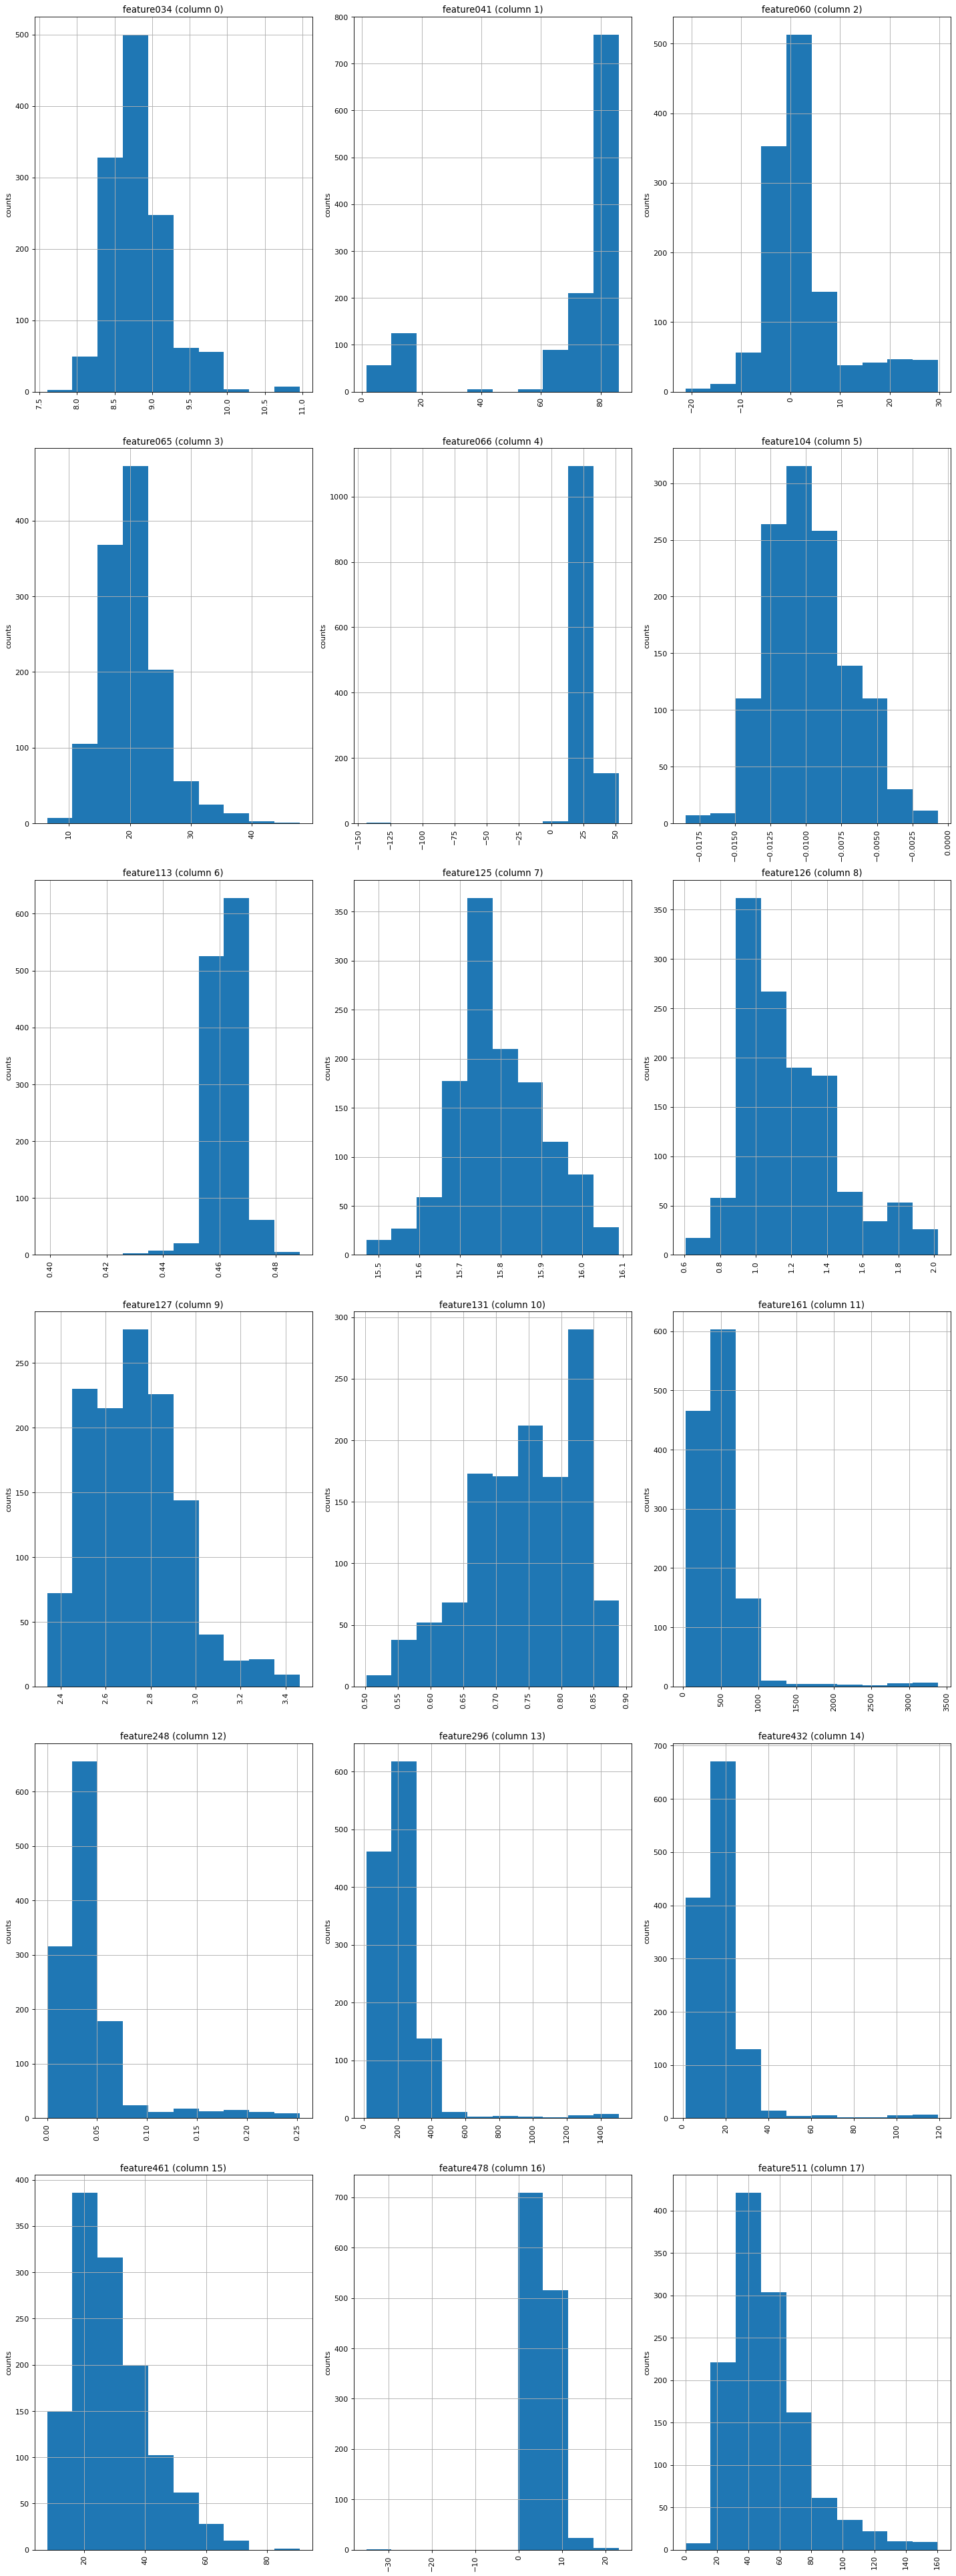

In [48]:
#Hiatogram

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(X_train_MICE_boruta, 18, 3)


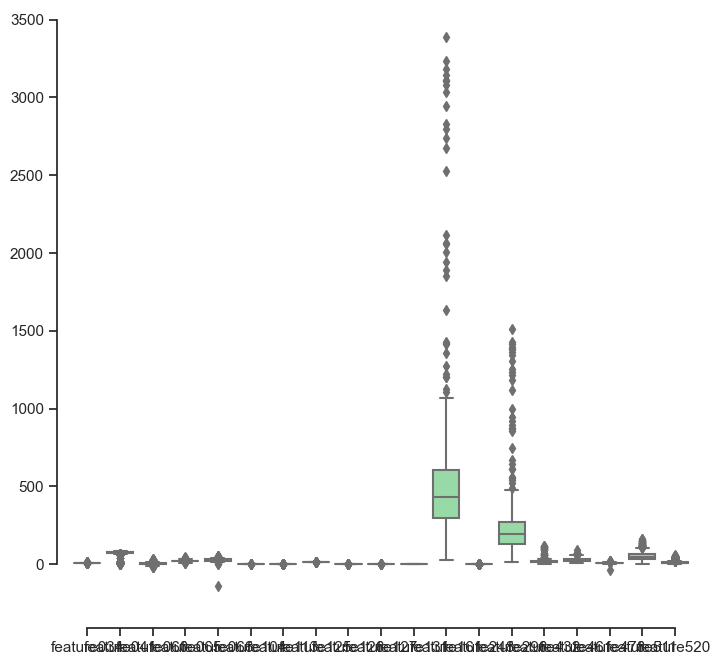

In [49]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot
sns.boxplot(palette=["m", "g"],data=X_train_MICE_boruta)
sns.despine(offset=10, trim=True)

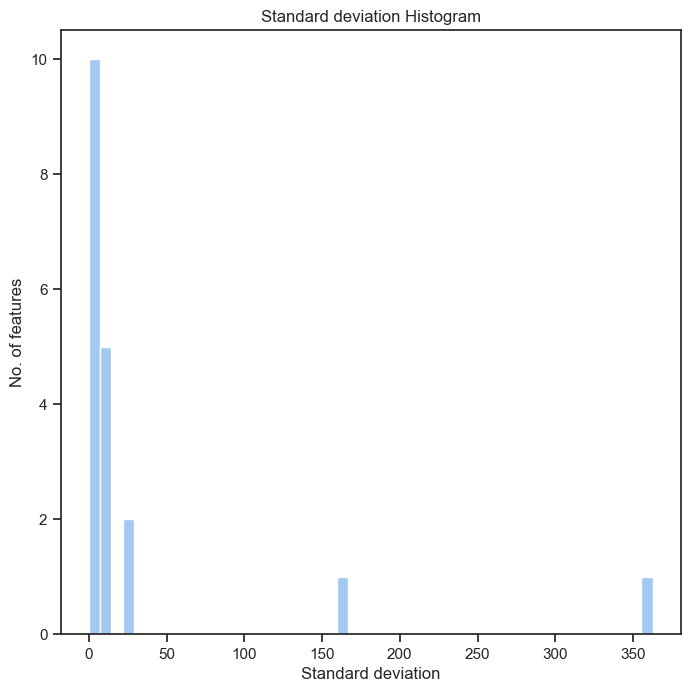

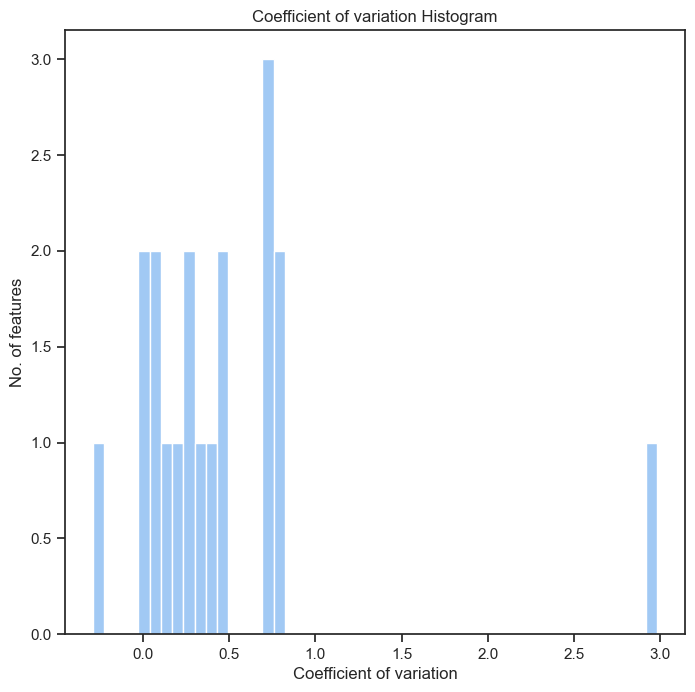

In [50]:
#checking std of features 

%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

plt.hist(X_train_MICE_boruta.std(), bins = 50)
plt.gca().set(title='Standard deviation Histogram', ylabel='No. of features', xlabel='Standard deviation');
plt.show()

%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

plt.hist(X_train_MICE_boruta.std()/X_train_MICE_boruta.mean(), bins = 50)
plt.gca().set(title='Coefficient of variation Histogram', ylabel='No. of features', xlabel='Coefficient of variation');
plt.show()

In [51]:
#Correlation

# Heatmap of correlation
corr = pd.DataFrame(X_train_MICE_boruta.corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


<AxesSubplot:xlabel='feature161'>

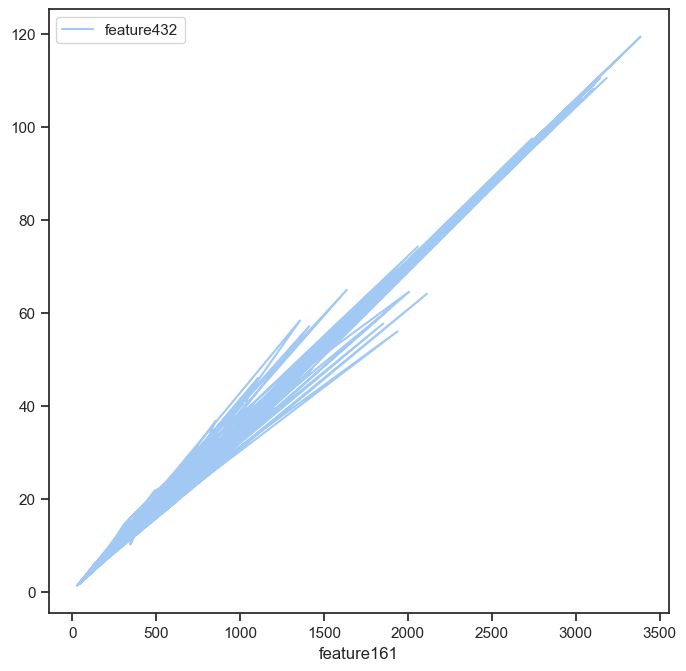

In [65]:
X_train_MICE_boruta.plot(x= 'feature161', y= 'feature432')

In [52]:
# calculating the z score of the values

z_train= pd.DataFrame(stats.zscore(X_train_MICE_boruta,nan_policy='omit'))

# calculating the number of outliers
sum(z_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0))))

307

## 5. SMOTE

In [53]:
fig = px.pie(
    y_train.value_counts(),
    values='Pass/Fail',
    names=["PASS", "FAIL"],
    title="Class Distribution of Train data",
    width=500
)

fig.show()


In [54]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [55]:
# transform the dataset
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X_train_MICE_boruta, y_train)

In [56]:
from collections import Counter
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({'PASS': 1177, 'FAIL': 1177})


In [57]:
# calculating the number of outliers
#Z TRANSFORM
scaler = StandardScaler()
scaler.fit(X_train)
a = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)


In [58]:
demo = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)

In [59]:
min(list(demo.std()))

0.0

In [60]:
max(list(demo.std()))

1.0008140009487847

In [61]:
# MIN MAX SCALE
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_train))
x_scaled

0         1         2         3         4         5         6    \
0     0.496020  0.474510  0.770245  0.373488  0.062876  0.636738  0.444444   
1     0.329029  0.264168  0.463730  0.377003  0.475638  0.400018  0.595238   
2     0.492509  0.381885  0.677459  0.691531  0.158266  0.341492  0.738095   
3     0.665296  0.463251  0.642706  0.923557  0.182425  0.151662  0.476190   
4     0.465551       NaN  0.352084  0.226980  0.180772  0.532887  0.531746   
...        ...       ...       ...       ...       ...       ...       ...   
1248  0.325854  0.409593  0.448958  0.318892  0.152935  0.607997  0.714286   
1249  0.153356  0.485414  0.851820  0.858576  0.142430  0.062397  0.357143   
1250  0.365462  0.405408  0.558032  0.304833  0.107111  0.380766  0.341270   
1251  0.340476  0.462875  0.705553  0.246018  0.105770  0.535159  0.253968   
1252  0.614193  0.738343  0.604524  0.494390  0.105614  0.477432  0.690476   

           7         8         9    ...       440       441       442  \
0     0.772090  0.448357  0.532110  ...  0.008470  0.249968  0.392857   
1     0.272705  0.453052  0.429358  ...       NaN       NaN  0.336735   
2     0.703667  0.383803  0.343119  ...  0.015207  0.233309  0.964286   
3     0.261137  0.638498  0.445872  ...  0.014755  0.185147  0.530612   
4     0.336451  0.469484  0.510092  ...  0.017136  0.365541  0.576531   
...        ...       ...       ...  ...       ...       ...       ...   
1248  0.493232  0.207746  0.677064  ...  0.018532  0.233251  0.239796   
1249  0.895397       NaN  0.596330  ...  0.018254  0.192424  0.663265   
1250  0.371400  0.357981  0.260550  ...  0.012587  0.267121  0.357143   
1251  0.591927  0.417840  0.449541  ...  0.010423  0.026148  0.622449   
1252  0.474280  0.282864  0.908257  ...  0.011386  0.240406  0.724490   

           443       444       445       446       447       448       449  
0     0.255474  0.292683  0.260849  0.378882  0.250000  0.217742  0.181397  
1     0.311436  0.292683  0.319568  0.305901  0.773684  0.790323  0.626950  
2     0.153285  0.170732  0.149930  0.771739  0.442105  0.516129  0.120663  
3     0.214112  0.231707  0.218380  0.388199  0.310526  0.282258  0.207659  
4     0.187348  0.207317  0.189731  0.484472  0.328947  0.290323  0.164718  
...        ...       ...       ...       ...       ...       ...       ...  
1248  0.231144  0.207317  0.237879  0.486025  0.068421  0.064516  0.060107  
1249  0.138686  0.146341  0.139631  0.711180  0.447368  0.532258  0.134109  
1250  0.177616  0.231707  0.182062  0.352484  0.731579  0.596774  0.489383  
1251  0.221411  0.256098  0.223629  0.040373  0.160526  0.161290  0.719054  
1252  0.192214  0.243902  0.192978  0.420807  0.194737  0.193548  0.132182  

[1253 rows x 450 columns]

In [62]:
min(list(x_scaled.std()))

0.0

In [63]:
max(list(x_scaled.std()))

0.3274586235972183